**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**
Owner: Colin, Prina

(Prina) 1) Hypothesis 1: Reducing average trip length (more short trips, fewer long trips) reduced the subsequent COVID-19 Case Count
- Regression

(Colin) 2) Hypothesis 2: Staying at home (higher % staying at home) reduced the subsequent COVID-19 Case Count
- Regression

In [48]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pathlib import Path
import os

In [105]:
#DATA READ IN
path = "../output_data/consolidated_new.csv"
consolidated = pd.read_csv(path)

path = "../output_data/national_covid.csv"
nation = pd.read_csv(path)

In [123]:
#WEEKLY GROUPING
df = consolidated
df["Date"] = df["Date"].astype('datetime64[ns]')
weekly_consolidated = df.groupby("state").resample('W-Wed', label='right', closed = 'right', on='Date').sum().reset_index().sort_values(by='Date')

In [124]:
#DATA CLEANUP, drop partial weeks
weekly_consolidated = weekly_consolidated.drop(['tot_cases%',"tot_death%","Population Staying at Home%","Population Not Staying at Home%"],axis = 1,inplace=False)
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-01-02"]
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-11-24"]

In [125]:
weekly_consolidated["%HOME"] = weekly_consolidated["Population Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["%AWAY"] = weekly_consolidated["Population Not Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["DEATHS"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000
weekly_consolidated["CASES"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000

In [181]:
pre_covid = weekly_consolidated[weekly_consolidated["Date"] <= "2020-03-04"]
post_covid = weekly_consolidated[weekly_consolidated["Date"] > "2020-03-04"]

pre_covid_avg = pre_covid.groupby("state").mean()
post_covid_avg = post_covid.groupby("state").mean()

Text(0.5, 1.0, '')

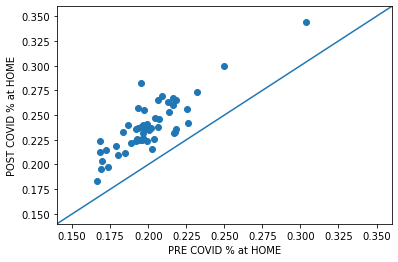

In [183]:
x = pre_covid_avg["%HOME"]
y = post_covid_avg["%HOME"]

plt.scatter(x,y)
plt.axline((0.15,0.15),(.35,.35))
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME")
plt.title("Everyone Stayed Home More during COVID")

Text(0.5, 1.0, 'Everyone Stayed Home More during COVID')

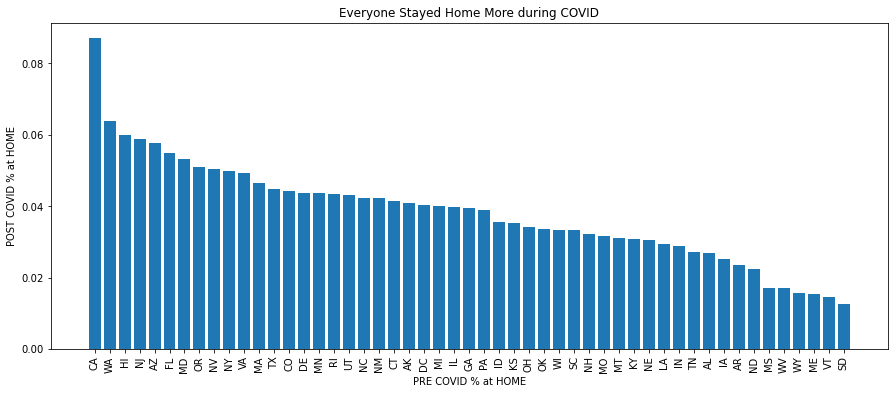

In [204]:
delta = pre_covid_avg["%HOME"] - post_covid_avg["%HOME"]
delta = delta.sort_values(ascending=True)
infections = post_covid_avg[]

y=-delta
x=delta.index

plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME")
plt.title("Everyone Stayed Home More during COVID")

In [205]:
post_covid_avg

,tot_cases,new_case,tot_death,new_death,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,%HOME,%AWAY,DEATHS,CASES
state,,,,,,,,,,,,,,,,,,,,,
AK,3.071259e+05,1585.744444,1709.111111,9.244444,1.397991e+06,3.714341e+06,1.662179e+07,4.590723e+06,4.404643e+06,2.149637e+06,...,8.165601e+05,3.398591e+05,7.143926e+04,3.560794e+04,42376.822222,5.112332e+06,0.273115,0.726885,0.185745,0.185745
AL,2.499506e+06,9366.044444,53917.511111,178.633333,6.663505e+06,2.737842e+07,1.101880e+08,2.434458e+07,2.564082e+07,1.439184e+07,...,6.036892e+06,2.380637e+06,1.036879e+06,2.030566e+05,45136.100000,3.404193e+07,0.195746,0.804254,0.521654,0.521654
AR,1.567875e+06,5820.733333,25451.366667,92.577778,4.133924e+06,1.684035e+07,6.680368e+07,1.561499e+07,1.652925e+07,8.310019e+06,...,3.552263e+06,1.579792e+06,7.592553e+05,1.392744e+05,31554.422222,2.097428e+07,0.197069,0.802931,0.439807,0.439807
AZ,3.820519e+06,13758.300000,74367.655556,243.766667,1.278552e+07,3.740539e+07,1.550135e+08,4.263667e+07,3.522355e+07,1.735829e+07,...,7.701738e+06,2.503372e+06,1.357786e+06,3.196588e+05,189977.355556,5.019091e+07,0.254673,0.745327,0.489153,0.489153
CA,1.591830e+07,53745.833333,246537.688889,811.111111,7.762814e+07,1.973841e+08,7.430747e+08,2.009143e+08,1.831456e+08,8.580782e+07,...,4.054754e+07,1.559632e+07,5.869494e+06,1.376746e+06,771128.422222,2.750122e+08,0.282095,0.717905,0.294527,0.294527
CO,2.255508e+06,8903.377778,30082.500000,98.644444,1.035907e+07,2.943853e+07,1.585360e+08,4.271288e+07,3.823886e+07,1.874926e+07,...,6.722500e+06,2.801474e+06,1.035562e+06,2.731375e+05,307286.755556,3.979761e+07,0.260159,0.739841,0.250028,0.250028
CT,1.398003e+06,4586.288889,41426.466667,98.333333,5.980053e+06,1.884858e+07,8.562112e+07,2.217730e+07,2.229885e+07,1.043599e+07,...,4.092374e+06,1.473857e+06,3.198129e+05,5.895350e+04,82131.911111,2.482864e+07,0.240583,0.759417,0.394252,0.394252
DC,2.182145e+05,726.555556,5561.477778,13.288889,1.685960e+06,3.209484e+06,2.034890e+07,7.681762e+06,5.045418e+06,2.617609e+06,...,4.043257e+05,8.482709e+04,4.198686e+04,2.659109e+04,36130.788889,4.895444e+06,0.344032,0.655968,0.270378,0.270378
DE,4.486593e+05,1667.177778,7578.422222,22.455556,1.590010e+06,5.156175e+06,2.282066e+07,5.939558e+06,5.587928e+06,2.810011e+06,...,1.176146e+06,4.370978e+05,1.408709e+05,1.136034e+04,8868.500000,6.746185e+06,0.235554,0.764446,0.334539,0.334539
